# **Telco Customers Churn Analysis and Predictive Models**

Khanh Tran

## Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv('../01.Data/telecom_customer_churn.csv')

# Display the first five rows to understand about dataset
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
# Shape of dataset
df.shape

(7043, 38)

In [4]:
# Data types of each variales
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [5]:
# Convert variables to the correct data types
categorical_columns = [
    'Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing',
    'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason', 'Contract',
    'Internet Type', 'Offer', 'City'
]

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Check the data types again to confirm the changes
df.dtypes


Customer ID                            object
Gender                               category
Age                                     int64
Married                              category
Number of Dependents                    int64
City                                 category
Zip Code                                int64
Latitude                              float64
Longitude                             float64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                category
Phone Service                        category
Avg Monthly Long Distance Charges     float64
Multiple Lines                       category
Internet Service                     category
Internet Type                        category
Avg Monthly GB Download               float64
Online Security                      category
Online Backup                        category
Device Protection Plan               category
Premium Tech Support              

In [6]:
# Number of missing values
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [7]:
# Summary statistics for numerical features
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
# To perform a comprehensive exploratory data analysis (EDA), we will look into the following aspects:
# 1. Basic information about the dataset: shape, data types, and missing values
# 2. Summary statistics for numerical features
# 3. Distribution of key categorical features
# 4. Distribution of numerical features
# 5. Correlation analysis among numerical features
# 6. Analysis of churn rate

# 1. Basic information about the dataset
basic_info = {
    "Shape": df.shape,
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum()
}

# 2. Summary statistics for numerical features
summary_statistics = df.describe()

# For distributions and correlations, we will selectively explore key variables.
# 3. Distribution of key categorical features
categorical_features = ['Gender', 'Married', 'Internet Service', 'Contract', 'Customer Status']

# 4. Distribution of numerical features
numerical_features = ['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 'Total Revenue']

# 5. Correlation analysis among numerical features
correlation_matrix = df[numerical_features].corr()

# Display basic info, summary statistics, and correlation matrix for now.
basic_info, summary_statistics, correlation_matrix


({'Shape': (7043, 38),
  'Data Types': Customer ID                            object
  Gender                               category
  Age                                     int64
  Married                              category
  Number of Dependents                    int64
  City                                 category
  Zip Code                                int64
  Latitude                              float64
  Longitude                             float64
  Number of Referrals                     int64
  Tenure in Months                        int64
  Offer                                category
  Phone Service                        category
  Avg Monthly Long Distance Charges     float64
  Multiple Lines                       category
  Internet Service                     category
  Internet Type                        category
  Avg Monthly GB Download               float64
  Online Security                      category
  Online Backup                        category
  D

20240225

In [9]:
# Read dataset
data = pd.read_csv('../01.Data/telecom_customer_churn.csv')

# Check for missing values in each column
missing_values = data.isnull().sum()

# Summary of data types and unique counts for categorical variables to plan for encoding
data_types = data.dtypes
unique_counts = data.select_dtypes(include=['object', 'category']).apply(lambda x: x.nunique())

# Display missing values, data types, and unique counts for categorical variables
missing_values, data_types, unique_counts


(Customer ID                             0
 Gender                                  0
 Age                                     0
 Married                                 0
 Number of Dependents                    0
 City                                    0
 Zip Code                                0
 Latitude                                0
 Longitude                               0
 Number of Referrals                     0
 Tenure in Months                        0
 Offer                                   0
 Phone Service                           0
 Avg Monthly Long Distance Charges     682
 Multiple Lines                        682
 Internet Service                        0
 Internet Type                        1526
 Avg Monthly GB Download              1526
 Online Security                      1526
 Online Backup                        1526
 Device Protection Plan               1526
 Premium Tech Support                 1526
 Streaming TV                         1526
 Streaming 

### Data Processing

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fill missing values for categorical columns where applicable
categorical_fillna = {
    'Multiple Lines': 'Not Subscribed',
    'Internet Type': 'No Internet',
    'Online Security': 'Not Subscribed',
    'Online Backup': 'Not Subscribed',
    'Device Protection Plan': 'Not Subscribed',
    'Premium Tech Support': 'Not Subscribed',
    'Streaming TV': 'Not Subscribed',
    'Streaming Movies': 'Not Subscribed',
    'Streaming Music': 'Not Subscribed',
    'Unlimited Data': 'Not Subscribed',
    'Churn Category': 'Not Churned',
    'Churn Reason': 'Not Churned'
}

data.fillna(categorical_fillna, inplace=True)

# Since 'Avg Monthly Long Distance Charges' and 'Avg Monthly GB Download' can be zero for non-subscribers, fill with 0
data['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
data['Avg Monthly GB Download'].fillna(0, inplace=True)

# Encoding binary categorical variables manually
binary_columns = ['Gender', 'Married', 'Phone Service', 'Paperless Billing']
binary_mapping = {'Female': 1, 'Male': 0, 'Yes': 1, 'No': 0}

for column in binary_columns:
    if data[column].dtype == 'object':  # Only apply if the column is categorical
        data[column] = data[column].map(binary_mapping)

# One hot encoding other categorical variables
ohe = OneHotEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['Customer ID', 'City', 'Churn Category', 'Churn Reason'])  # Exclude ID and City for encoding

for column in categorical_columns:
    data[column] = ohe.fit_transform(data[column])

# Check the dataset after preprocessing
data.head(), data.isnull().sum().sum()  # Display first few rows and total missing values count


(  Customer ID  Gender  Age  Married  Number of Dependents          City  \
 0  0002-ORFBO       1   37        1                     0  Frazier Park   
 1  0003-MKNFE       0   46        0                     0      Glendale   
 2  0004-TLHLJ       0   50        0                     0    Costa Mesa   
 3  0011-IGKFF       0   78        1                     0      Martinez   
 4  0013-EXCHZ       1   75        1                     0     Camarillo   
 
    Zip Code   Latitude   Longitude  Number of Referrals  ...  Payment Method  \
 0     93225  34.827662 -118.999073                    2  ...               1   
 1     91206  34.162515 -118.203869                    0  ...               1   
 2     92627  33.645672 -117.922613                    0  ...               0   
 3     94553  38.014457 -122.115432                    1  ...               0   
 4     93010  34.227846 -119.079903                    3  ...               1   
 
    Monthly Charge  Total Charges  Total Refunds  Tota

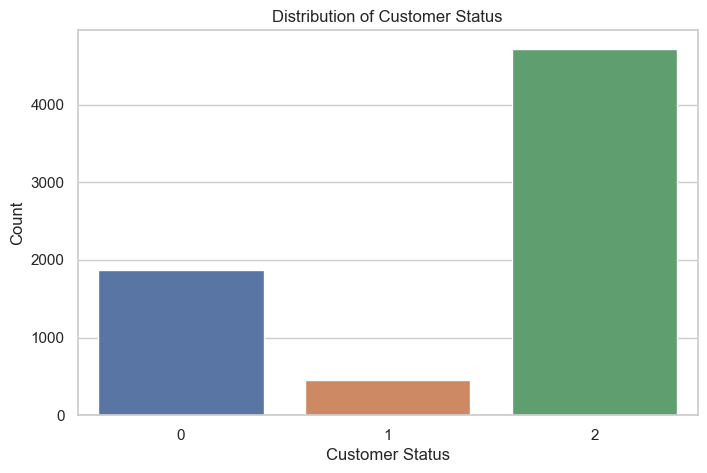

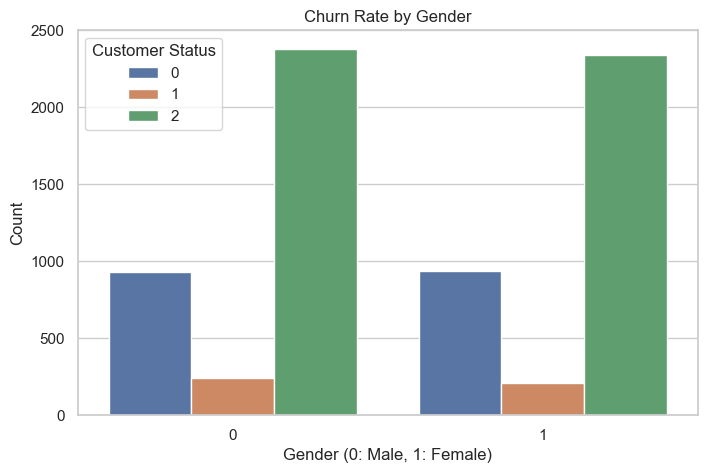

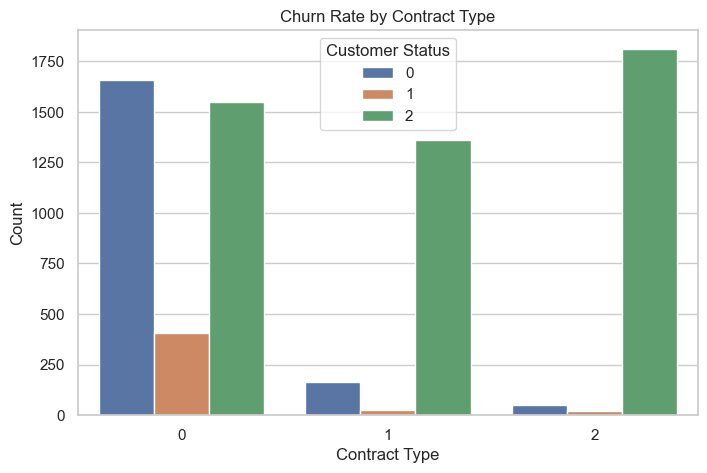

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Exploratory Data Analysis: Visualizing the distribution of churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=data)
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

# Analyzing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=data)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


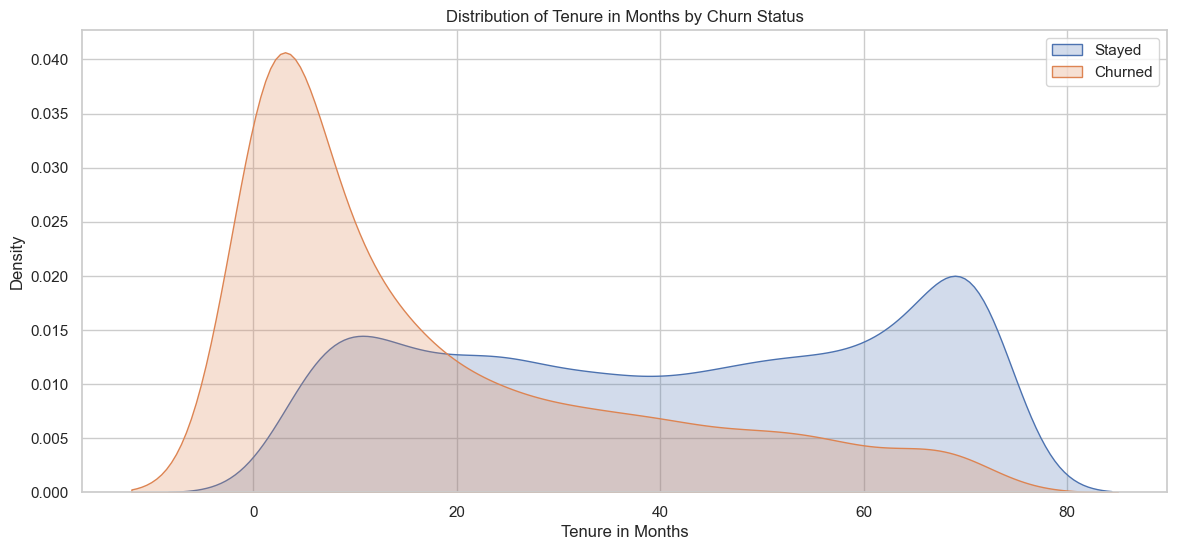

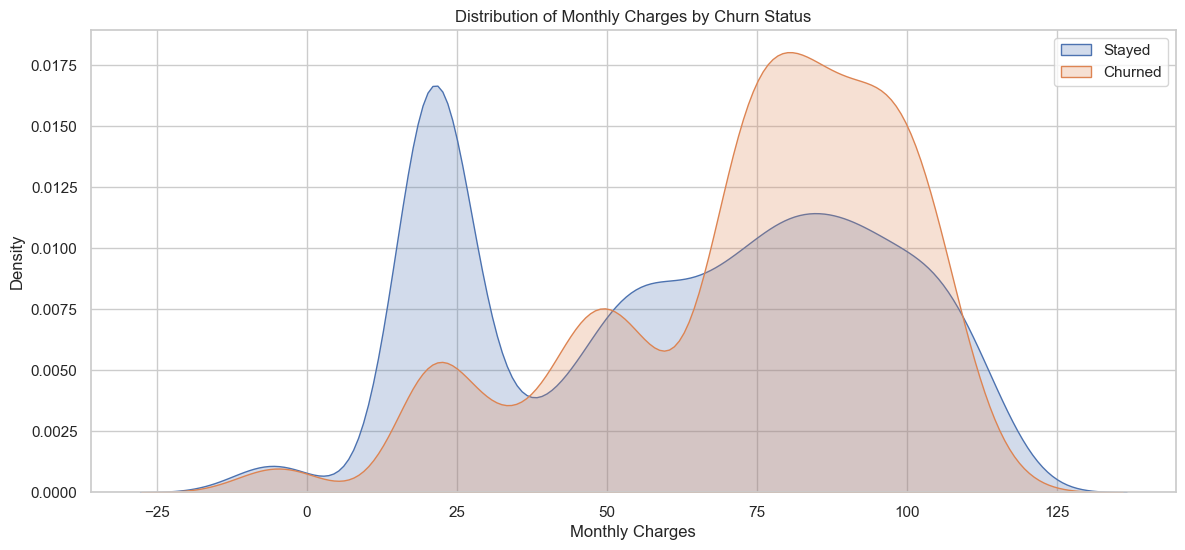

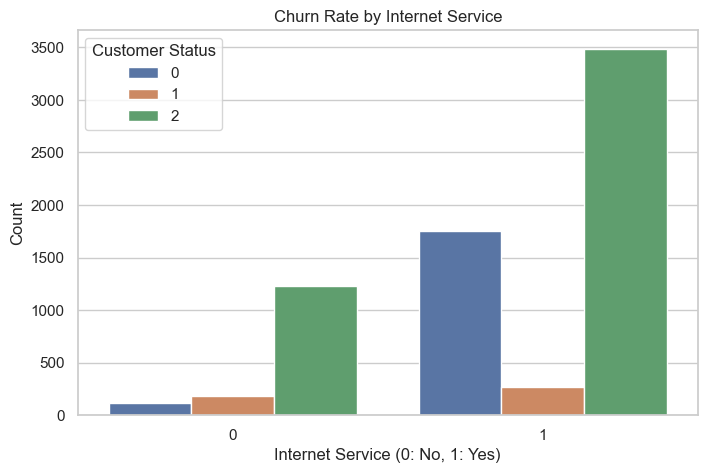

In [12]:
# Analyzing Tenure in Months vs. Churn
plt.figure(figsize=(14, 6))
sns.kdeplot(data=data[data['Customer Status'] == 2]['Tenure in Months'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 0]['Tenure in Months'], label='Churned', fill=True)
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Monthly Charges vs. Churn
plt.figure(figsize=(14, 6))
sns.kdeplot(data=data[data['Customer Status'] == 2]['Monthly Charge'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 0]['Monthly Charge'], label='Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Internet Service vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Service', hue='Customer Status', data=data)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing the dataset for modeling
# Using 'Customer Status' as the target variable, where 'Stayed' (2) and 'Churned' (0) will be used for binary classification
X = data.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason', 'Customer Status'])
y = data['Customer Status'].apply(lambda x: 1 if x == 2 else 0)  # Recoding 'Stayed' as 1, 'Churned' or 'Joined' as 0 for binary classification

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the train and test sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((5634, 30), (1409, 30), (5634,), (1409,))

In [14]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "LinearSVC": LinearSVC(max_iter=1000, random_state=42),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42)
}



# Dictionary to hold model scores
model_scores = {}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculating scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Storing scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC-AUC": roc_auc}

# Displaying model scores
model_scores_df = pd.DataFrame(model_scores).T
model_scores_df.sort_values('Accuracy', ascending=False)


c:\KhanhTV5\GitHub\Repos\DASC6910-GraduateProject\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Gradient Boosting,0.882186,0.886887,0.943557,0.914345,0.851566
Random Forest,0.877928,0.878578,0.947817,0.911885,0.843057
AdaBoost Classifier,0.874379,0.887984,0.928647,0.907860,0.847302
Bagging Classifier,0.871540,0.899789,0.908413,0.904081,0.853143
SVC,0.842441,0.880978,0.882854,0.881915,0.822278
Logistic Regression,0.840312,0.890591,0.866880,0.878575,0.827057
LinearSVC,0.836054,0.895973,0.853035,0.873977,0.827581
Decision Tree,0.833925,0.872228,0.879659,0.875928,0.811106
Ridge Classifier,0.833215,0.891111,0.854100,0.872213,0.822795
MLP Classifier,0.833215,0.871308,0.879659,0.875464,0.810042


In [15]:
model_scores_df.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Gradient Boosting,0.882186,0.886887,0.943557,0.914345,0.851566
Random Forest,0.877928,0.878578,0.947817,0.911885,0.843057
AdaBoost Classifier,0.874379,0.887984,0.928647,0.907860,0.847302
Bagging Classifier,0.871540,0.899789,0.908413,0.904081,0.853143
SVC,0.842441,0.880978,0.882854,0.881915,0.822278
Logistic Regression,0.840312,0.890591,0.866880,0.878575,0.827057
LinearSVC,0.836054,0.895973,0.853035,0.873977,0.827581
Decision Tree,0.833925,0.872228,0.879659,0.875928,0.811106
Ridge Classifier,0.833215,0.891111,0.854100,0.872213,0.822795
MLP Classifier,0.833215,0.871308,0.879659,0.875464,0.810042


In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid setup
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Grid Search CV
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

# Gradient Boosting Grid Search CV
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
gb_grid_search.fit(X_train_scaled, y_train)

# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

rf_best_params, rf_best_score, gb_best_params, gb_best_score


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.8812570823371437,
 {'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.8874681048572027)

In [17]:
# # Corrected Data Preprocessing
# # Dropping rows with NaN values to simplify
# data_cleaned = data.dropna()

# # Selecting numerical features and target for the simplified example
# X = data_cleaned.select_dtypes(include=['number']).drop(columns=['Customer Status'])
# y = data_cleaned['Customer Status']

# # Splitting the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scaling the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Hyperparameter grids
gb_grid = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5]}
ada_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0]}
rf_grid = {'n_estimators': [100, 200], 'max_depth': [10, None], 'min_samples_split': [2, 10]}
bagging_grid = {'n_estimators': [10, 50], 'max_samples': [0.5, 1.0]}
dt_grid = {'max_depth': [None, 10], 'min_samples_split': [2, 10]}

# Grid search setup for each model
grids = {
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), gb_grid),
    "AdaBoost": (AdaBoostClassifier(random_state=42), ada_grid),
    "Random Forest": (RandomForestClassifier(random_state=42), rf_grid),
    "Bagging Classifier": (BaggingClassifier(random_state=42), bagging_grid),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), dt_grid)
}

# Dictionary to hold best parameters for each model
best_params = {}

# Performing grid search
for model_name, (model, grid) in grids.items():
    grid_search = GridSearchCV(model, grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_params[model_name] = grid_search.best_params_

best_params


{'Gradient Boosting': {'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100},
 'AdaBoost': {'learning_rate': 1.0, 'n_estimators': 50},
 'Random Forest': {'max_depth': 10,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Bagging Classifier': {'max_samples': 0.5, 'n_estimators': 50},
 'Decision Tree': {'max_depth': 10, 'min_samples_split': 2}}